<a href="https://colab.research.google.com/github/iam-ajitkumartoppo/credit_card_default_prediction/blob/main/Credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="color:white;background-color:#3cb371">Credit card default prediction</h2>

In [1]:
#importing python module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#loading the dataset
df = pd.read_csv("credit card default.csv")

In [4]:
#display first 3 rows 
df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [5]:
#display last 3 rows
df.tail(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
df.shape

(30000, 25)

In [7]:
#Checking the statistical discription of our dataset
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
#to print information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
#for convenience changing the name of column from "default payment next month" to "default"
df = df.rename(columns = {'default payment next month': 'default'})

In [10]:
#to print the name of all the columns present
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

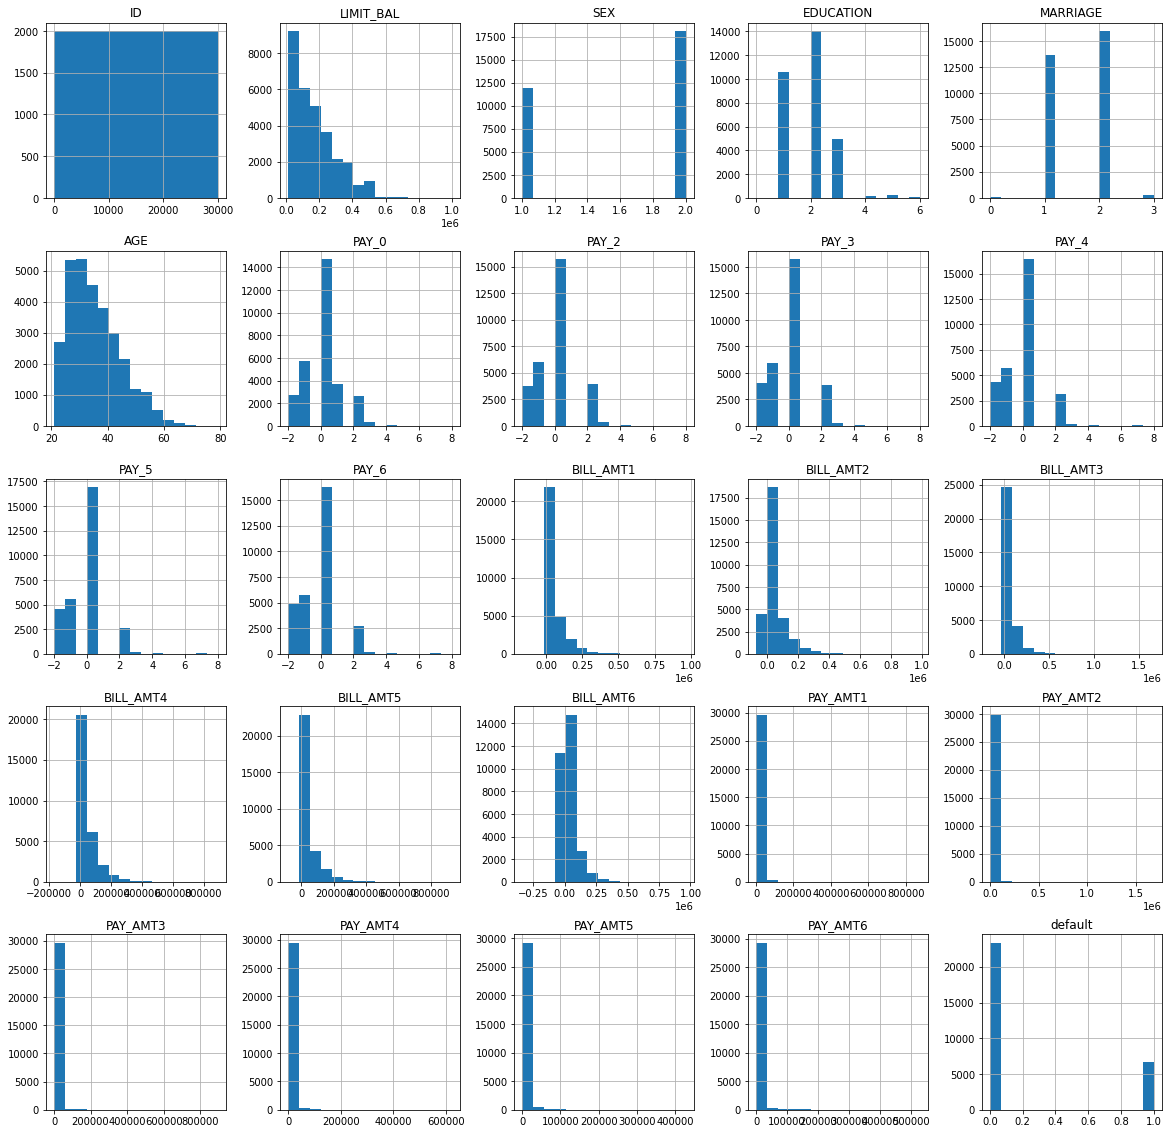

In [11]:
#to get an intuitive sense of the distribution of values within variable.
df.hist(bins=15, figsize=(20,20))
plt.show()

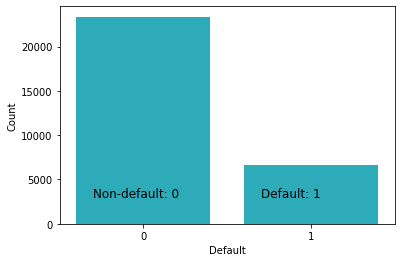

In [12]:
#to plot number of defaulters vs non-defaulters
plt.figure()
sns.countplot(x="default", data=df, color ='tab:cyan')
plt.annotate('Non-default: {}'.format(0), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(1), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.xlabel("Default")
plt.ylabel("Count")
plt.show()

for classification model in this dataset  our target class is  "default". This is an imbalanced dataset because the target column contains more number of observations for non-default cases and less number of observations for default cases.

In [13]:
#to count number of records present for defaulter vs non-defaulter
df["default"].value_counts()

0    23364
1     6636
Name: default, dtype: int64

Out of 30000 credit card users 6,636 are defaulters and the rest 23,364 are non-defaulters

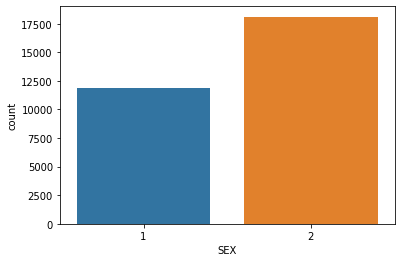

In [14]:
#to plot a countplot for male vs female credit card user data present
sns.countplot(data=df, x= "SEX")

In [15]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

Out of 30000 records available of different credit card users 18,112 are females and 11,888 are males.

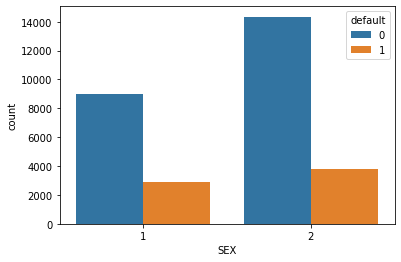

In [16]:
sns.countplot(x="SEX", hue = "default", data=df)

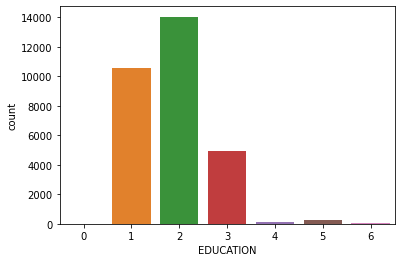

In [17]:
sns.countplot(x="EDUCATION",data=df)

In [18]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

maximum records are available for people having education as (university-14030)
,(graduate school-10585)
 (high school-4917)

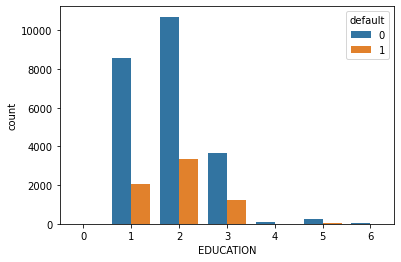

In [19]:
sns.countplot(x="EDUCATION",hue="default",data=df)

In [20]:
df["AGE"].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

Majority of credit card holder are in their 20's and 30's.

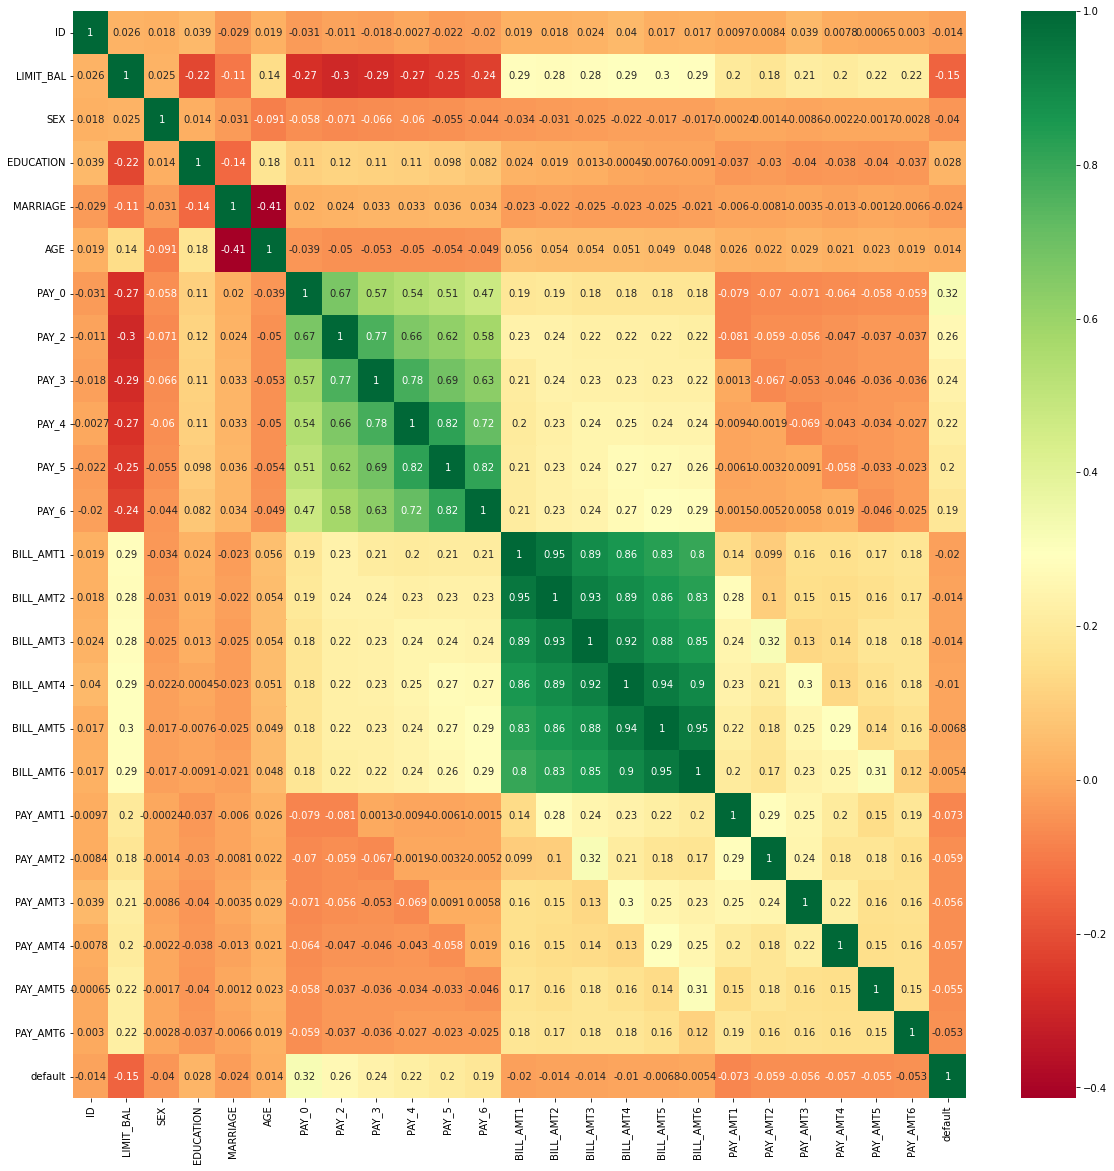

In [21]:
corrmap = df.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))
#making of heatmap
df_heatmap = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [22]:
#drop the column ID
df = df.drop('ID', axis=1)

In [23]:
#Splitting the data into features and target class
Y = df['default']
X = df.drop('default', axis=1)    

In [24]:
Y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

In [25]:
#importing SMOTE to deal with imbalanced dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()    

In [26]:
X_smote, Y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'default')], df['default'])

In [27]:
X = X_smote

In [28]:
Y = Y_smote

In [29]:
X

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,50000,1,2,1,25,0,0,0,0,0,...,35122,21289,19262,18893,1802,1504,1329,1196,860,883
46724,30000,1,2,1,53,0,0,0,0,2,...,26898,29455,28601,30212,1494,1926,3007,0,2202,2439
46725,130000,1,1,1,43,-1,0,-1,-1,0,...,597,677,677,287,246,597,677,246,0,492
46726,30000,2,2,2,23,0,0,0,0,0,...,28744,27870,28236,29157,1514,1715,1098,1439,1766,1061


In [30]:
def onehot_encode(X, column_dict):
    X = X.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(X[column], prefix=prefix)
        X = pd.concat([X, dummies], axis=1)
        X = X.drop(column, axis=1)
    return X

In [31]:
#using one hot encoding to transform EDUCATION,MARRIAGE & SEX column
X = onehot_encode(X,{'EDUCATION': 'EDU','MARRIAGE': 'MAR','SEX': 'sex'})

In [32]:
#using standard scaler to transform data into suitable format
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [33]:
X

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDU_3,EDU_4,EDU_5,EDU_6,MAR_0,MAR_1,MAR_2,MAR_3,sex_1,sex_2
0,-1.065480,-1.288654,1.631151,1.616456,-0.800687,-0.755470,-1.572786,-1.533096,-0.625775,-0.632217,...,-0.370121,-0.058616,-0.078887,-0.033055,-0.038455,0.904863,-0.889438,-0.084077,-0.989229,0.989229
1,-0.270852,-1.062131,-1.039315,1.616456,0.018387,0.064944,0.111485,1.810865,-0.642471,-0.651473,...,-0.370121,-0.058616,-0.078887,-0.033055,-0.038455,-1.105140,1.124306,-0.084077,-0.989229,0.989229
2,-0.509240,-0.156040,-0.149159,-0.024120,0.018387,0.064944,0.111485,0.138884,-0.282266,-0.479442,...,-0.370121,-0.058616,-0.078887,-0.033055,-0.038455,-1.105140,1.124306,-0.084077,-0.989229,0.989229
3,-0.827092,0.183744,-0.149159,-0.024120,0.018387,0.064944,0.111485,0.138884,-0.041501,-0.001106,...,-0.370121,-0.058616,-0.078887,-0.033055,-0.038455,0.904863,-0.889438,-0.084077,-0.989229,0.989229
4,-0.827092,2.448972,-1.039315,-0.024120,-0.800687,0.064944,0.111485,0.138884,-0.561972,-0.596306,...,-0.370121,-0.058616,-0.078887,-0.033055,-0.038455,0.904863,-0.889438,-0.084077,1.010888,-1.010888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,-0.827092,-1.175392,-0.149159,-0.024120,0.018387,0.064944,0.111485,0.138884,-0.097735,-0.094183,...,-0.370121,-0.058616,-0.078887,-0.033055,-0.038455,0.904863,-0.889438,-0.084077,1.010888,-1.010888
46724,-0.986017,1.995926,-0.149159,-0.024120,0.018387,0.064944,1.795755,0.138884,-0.349243,-0.320528,...,-0.370121,-0.058616,-0.078887,-0.033055,-0.038455,0.904863,-0.889438,-0.084077,1.010888,-1.010888
46725,-0.191389,0.863313,-1.039315,-0.024120,-0.800687,-0.755470,0.111485,0.138884,-0.673559,-0.670141,...,-0.370121,-0.058616,-0.078887,-0.033055,-0.038455,0.904863,-0.889438,-0.084077,1.010888,-1.010888
46726,-0.986017,-1.401915,-0.149159,-0.024120,0.018387,0.064944,0.111485,0.138884,-0.293253,-0.284687,...,-0.370121,-0.058616,-0.078887,-0.033055,-0.038455,-1.105140,1.124306,-0.084077,-0.989229,0.989229


In [34]:
Y

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: default, Length: 46728, dtype: int64

In [35]:
#splitting the dataset for training and testing purpose
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=7)

In [36]:
X_train.shape

(37382, 33)

In [37]:
X_test.shape

(9346, 33)

In [38]:
Y_train.shape

(37382,)

In [39]:
Y_test.shape

(9346,)

In [40]:
#importing various classification model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [41]:
#fitting the data in logistic regression classifier
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_predlr = lr.predict(X_test)

In [42]:
#importing classification evalution metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

logistic regression classification report 
               precision    recall  f1-score   support

           0       0.71      0.72      0.72      4619
           1       0.73      0.72      0.72      4727

    accuracy                           0.72      9346
   macro avg       0.72      0.72      0.72      9346
weighted avg       0.72      0.72      0.72      9346



Text(377.15999999999997, 0.5, 'True_default')

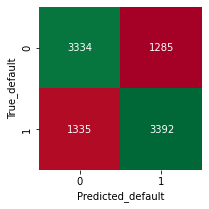

In [43]:
#print the confusion matrix and results for logistic rregression classifier model 
print("logistic regression classification report \n", classification_report(Y_test, Y_predlr))
matrix_confusion = confusion_matrix(Y_test, Y_predlr)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [44]:
#fitting the data in k neigherest neighbour classifier model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_predknn = knn.predict(X_test)

k nearest neighbor classification report 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      4619
           1       0.75      0.77      0.76      4727

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346



Text(377.15999999999997, 0.5, 'True_default')

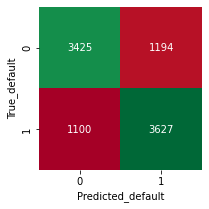

In [45]:
#print the confusion matrix and results for k neigherest neighbour classifier model 
print("k nearest neighbor classification report \n", classification_report(Y_test, Y_predknn))
matrix_confusion = confusion_matrix(Y_test, Y_predknn)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [46]:
#fitting the data in Naive Bayes classification model
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_prednb = nb.predict(X_test)

Naive Bayes classification report 
               precision    recall  f1-score   support

           0       0.80      0.11      0.19      4619
           1       0.53      0.97      0.68      4727

    accuracy                           0.55      9346
   macro avg       0.66      0.54      0.44      9346
weighted avg       0.66      0.55      0.44      9346



Text(377.15999999999997, 0.5, 'True_default')

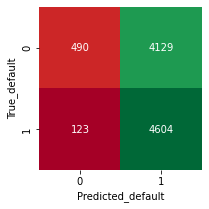

In [47]:
#print the confusion matrix and results for Naive Bayes classification model 
print("Naive Bayes classification report \n", classification_report(Y_test, Y_prednb))
matrix_confusion = confusion_matrix(Y_test, Y_prednb)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [48]:
#fitting the data in upport Vector Machine classification model
svm = SVC()
svm.fit(X_train,Y_train)
Y_predsvm = svm.predict(X_test)

Support Vector Machine classification report 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      4619
           1       0.77      0.72      0.75      4727

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346



Text(377.15999999999997, 0.5, 'True_default')

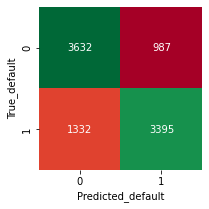

In [49]:
#print the confusion matrix and results for Support Vector Machine classification model 
print("Support Vector Machine classification report \n", classification_report(Y_test, Y_predsvm))
matrix_confusion = confusion_matrix(Y_test, Y_predsvm)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')

In [50]:
#fitting the data in Random Forest classification model
rfm = RandomForestClassifier()
rfm.fit(X_train,Y_train)
Y_predrfm = rfm.predict(X_test)

Random Forest classification report 
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      4619
           1       0.85      0.82      0.83      4727

    accuracy                           0.83      9346
   macro avg       0.83      0.83      0.83      9346
weighted avg       0.83      0.83      0.83      9346



Text(377.15999999999997, 0.5, 'True_default')

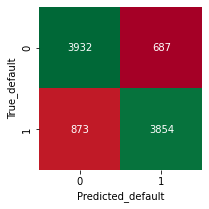

In [51]:
#print the confusion matrix and results for Random Forest classification model 
print("Random Forest classification report \n", classification_report(Y_test, Y_predrfm))
matrix_confusion = confusion_matrix(Y_test, Y_predrfm)
plt.figure(figsize = (13,3))
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False )
plt.xlabel('Predicted_default')
plt.ylabel('True_default')